<a href="https://colab.research.google.com/github/ananyatiwari2709/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install bing-image-downloader

In [8]:
!mkdir images

In [9]:
from bing_image_downloader import downloader
downloader.download("cute cats",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://www.reportingday.com/wp-content/uploads/2018/06/Cat-Sleeping-Pics.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/SBjCQX7Lh2Q/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://4.bp.blogspot.com/_dedcXqzPdxo/TRTkwvgijKI/AAAAAAAABt4/SRz-CDS30F0/s1600/Cat_pictures2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://welovecatsandkittens.com/wp-content/uploads/2018/03/cute-2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/--mqQKXiTD0E/UIURXCYUxUI/AAAAAAAAHuQ/8jMmIdkdLX8/s1600/cats_desktop_1920x1200_hd-wallpaper-817100.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.ytimg.com/vi/W-PBFMECvTE/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://2.bp.blogspot.com/-yne2f8kYEZU/URNWyRZypQI/AAAAAAAAAbc/OxwZVmfpUZI/s1600/hungry-baby-cat-wallpaper.jpg
[%]

In [10]:
from bing_image_downloader import downloader
downloader.download("monkeys",limit=30,output_dir="images",adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://bsj.berkeley.edu/wp-content/uploads/2019/04/20FLOATER-superJumbo-v2.jpg
[!] Issue getting: https://bsj.berkeley.edu/wp-content/uploads/2019/04/20FLOATER-superJumbo-v2.jpg
[!] Error:: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:852)>
[%] Downloading Image #1 from https://northcoastcourier.co.za/wp-content/uploads/sites/73/2016/02/online-monkeys-1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn.britannica.com/06/128906-050-8E46C828/Rhesus-monkey.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.japantimes.co.jp/wp-content/uploads/2017/03/p21-nicol-monkeys-b-20170305-e1488613964660.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/a4/50/cd/a450cd5a468c58b888ec6318fae84ad1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hakaimagazine.com/wp-content/uploads/looking-

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [12]:
target = []
images = []
flat_data = []

In [13]:
DATADIR = "/content/images"
CATEGORIES = ['cute cats','monkeys']

In [14]:
for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

In [15]:
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

<BarContainer object of 2 artists>

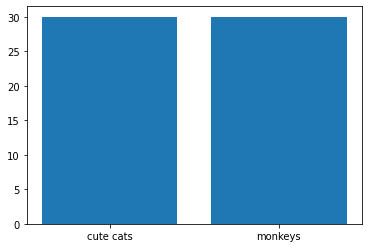

In [16]:
unique,count = np.unique(target,return_counts= True)
plt.bar(CATEGORIES,count)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)



GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [20]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [24]:
accuracy_score(y_pred,y_test)

0.4444444444444444

In [23]:
confusion_matrix(y_pred,y_test)

array([[ 1,  0],
       [10,  7]])

In [25]:
import pickle 
pickle.dump(clf,open('img_model.p','wb'))

In [26]:
model = pickle.load(open('img_model.p','rb'))

Enter the URL https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2020%2F06%2F26%2Ftiny-white-kitten-873941684-2000.jpg
(2000, 1600, 3)
PREDICTED OUTPUT : cute cats


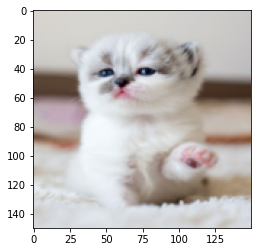

In [37]:
#testing a brand new image
flat_data = []
url = input('Enter the URL ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT : {y_out}')